In [2]:
# Retail & Marketing Analytics Project
# Notebook 1: Data Acquisition and Setup

"""
Project: Retail & Marketing Analytics - Customer Segmentation & Sales Optimization
Notebook: 01 - Data Acquisition and Setup
Author: Nupur Mirje
Date: October 2025

Objective:
- Setup project environment
- Download dataset from Kaggle
- Initial data inspection
- Create project folder structure
"""

# ============================================================================
# 1. IMPORT LIBRARIES
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from pathlib import Path
import zipfile

# Visualization settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.5


In [3]:
# ============================================================================
# 2. CREATE PROJECT FOLDER STRUCTURE
# ============================================================================

# Define folder structure
folders = [
    'data/raw',
    'data/processed',
    'notebooks',
    'scripts',
    'dashboards',
    'outputs/figures',
    'outputs/reports',
    'docs'
]

# Create folders
for folder in folders:
    Path(folder).mkdir(parents=True, exist_ok=True)
    print(f"✓ Created: {folder}")

print("\nProject structure created successfully!")


✓ Created: data/raw
✓ Created: data/processed
✓ Created: notebooks
✓ Created: scripts
✓ Created: dashboards
✓ Created: outputs/figures
✓ Created: outputs/reports
✓ Created: docs

Project structure created successfully!


In [18]:
# ============================================================================
# 3. LOAD DATASET
# ============================================================================
# Load dataset from local project directory (data/raw)

try:
    df_sales = pd.read_csv('data/raw/retail_sales_data.csv')
    print("\n✓ Dataset loaded successfully from data/raw/")

except FileNotFoundError:
    print("\n Dataset not found. Creating sample data for demonstration...")
    
    # NOTE:
    # This fallback sample dataset is created ONLY if the real dataset
    # is missing. It ensures reproducibility during project review.

    np.random.seed(42)
    n_records = 10000

    df_sales = pd.DataFrame({
        'Order_ID': [f'ORD{str(i).zfill(6)}' for i in range(1, n_records+1)],
        'Order_Date': pd.date_range(start='2022-01-01', periods=n_records, freq='H'),
        'Ship_Date': pd.date_range(start='2022-01-02', periods=n_records, freq='H'),
        'Customer_ID': [f'CUST{np.random.randint(1, 2000):04d}' for _ in range(n_records)],
        'Customer_Name': [f'Customer_{i}' for i in np.random.randint(1, 2000, n_records)],
        'Segment': np.random.choice(['Consumer', 'Corporate', 'Home Office'], n_records, p=[0.5, 0.3, 0.2]),
        'Region': np.random.choice(['East', 'West', 'Central', 'South'], n_records, p=[0.3, 0.25, 0.25, 0.2]),
        'Product_ID': [f'PROD{np.random.randint(1, 500):04d}' for _ in range(n_records)],
        'Product_Category': np.random.choice(
            ['Electronics', 'Furniture', 'Office Supplies', 'Clothing'],
            n_records, p=[0.3, 0.2, 0.3, 0.2]
        ),
        'Product_Sub_Category': np.random.choice(
            ['Phones', 'Chairs', 'Paper', 'Accessories', 'Tables',
             'Binders', 'Appliances', 'Shirts'], n_records
        ),
        'Product_Name': [f'Product_{i}' for i in np.random.randint(1, 500, n_records)],
        'Sales': np.random.gamma(2, 50, n_records) + 10,
        'Quantity': np.random.randint(1, 10, n_records),
        'Discount': np.random.choice([0, 0.1, 0.15, 0.2, 0.25], n_records,
                                     p=[0.4, 0.2, 0.2, 0.15, 0.05]),
        'Profit': np.random.normal(20, 30, n_records),
        'Shipping_Cost': np.random.gamma(1.5, 3, n_records) + 2,
        'Order_Priority': np.random.choice(['Low', 'Medium', 'High', 'Critical'],
                                           n_records, p=[0.3, 0.4, 0.2, 0.1])
    })

    df_sales['Unit_Price'] = df_sales['Sales'] / df_sales['Quantity']
    df_sales['Revenue'] = df_sales['Sales']

    df_sales.loc[np.random.choice(df_sales.index, 50, replace=False), 'Customer_Name'] = np.nan
    df_sales.loc[np.random.choice(df_sales.index, 30, replace=False), 'Profit'] = np.nan

    df_sales.to_csv('data/raw/retail_sales_data.csv', index=False)
    print("✓ Sample dataset created and saved in data/raw/")



✓ Dataset loaded successfully from data/raw/


In [19]:
# ============================================================================
# 4. INITIAL DATA INSPECTION
# ============================================================================

print("\n" + "="*80)
print("INITIAL DATA INSPECTION")
print("="*80)

# Dataset shape
print(f"\n Dataset Shape: {df_sales.shape[0]:,} rows × {df_sales.shape[1]} columns")

# First few rows
print("\n First 5 Rows:")
print(df_sales.head())

# Last few rows
print("\n Last 5 Rows:")
print(df_sales.tail())

# Column information
print("\n Column Information:")
print(df_sales.info())

# Data types
print("\n Data Types:")
print(df_sales.dtypes)


INITIAL DATA INSPECTION

 Dataset Shape: 10,000 rows × 19 columns

 First 5 Rows:
    Order_ID           Order_Date            Ship_Date Customer_ID  \
0  ORD000001  2022-01-01 00:00:00  2022-01-02 00:00:00    CUST1127   
1  ORD000002  2022-01-01 01:00:00  2022-01-02 01:00:00    CUST1460   
2  ORD000003  2022-01-01 02:00:00  2022-01-02 02:00:00    CUST0861   
3  ORD000004  2022-01-01 03:00:00  2022-01-02 03:00:00    CUST1295   
4  ORD000005  2022-01-01 04:00:00  2022-01-02 04:00:00    CUST1131   

   Customer_Name    Segment   Region Product_ID Product_Category  \
0  Customer_1275   Consumer  Central   PROD0215  Office Supplies   
1  Customer_1334  Corporate     East   PROD0002        Furniture   
2  Customer_1744  Corporate     East   PROD0121      Electronics   
3   Customer_833  Corporate     East   PROD0103         Clothing   
4   Customer_140   Consumer    South   PROD0149  Office Supplies   

  Product_Sub_Category Product_Name  Sales  Quantity  Discount  Profit  \
0           A

In [20]:
# ============================================================================
# 5. BASIC STATISTICS
# ============================================================================

print("\n" + "="*80)
print("BASIC STATISTICAL SUMMARY")
print("="*80)

# Numerical columns summary
print("\n Numerical Columns Statistics:")
print(df_sales.describe())

# Categorical columns summary
print("\n Categorical Columns Summary:")
categorical_cols = df_sales.select_dtypes(include=['object']).columns
for col in categorical_cols[:5]:  # First 5 categorical columns
    print(f"\n{col}:")
    print(df_sales[col].value_counts().head())


BASIC STATISTICAL SUMMARY

 Numerical Columns Statistics:
         Sales  Quantity  Discount  Profit  Shipping_Cost  Unit_Price  Revenue
count 10000.00  10000.00  10000.00 9970.00       10000.00    10000.00 10000.00
mean    109.92      5.01      0.09   19.81           6.52       34.60   109.92
std      71.36      2.58      0.08   30.51           3.69       42.69    71.36
min      10.35      1.00      0.00  -97.44           2.01        1.36    10.35
25%      58.33      3.00      0.00   -0.68           3.85       11.11    58.33
50%      92.92      5.00      0.10   20.33           5.59       20.53    92.92
75%     145.13      7.00      0.15   40.31           8.16       39.76   145.13
max     622.94      9.00      0.25  133.70          36.47      540.18   622.94

 Categorical Columns Summary:

Order_ID:
Order_ID
ORD000001    1
ORD000002    1
ORD000003    1
ORD000004    1
ORD000005    1
Name: count, dtype: int64

Order_Date:
Order_Date
2022-01-01 00:00:00    1
2022-01-01 01:00:00    1
2022

In [21]:
# ============================================================================
# 6. DATA QUALITY CHECK
# ============================================================================

print("\n" + "="*80)
print("DATA QUALITY ASSESSMENT")
print("="*80)

# Missing values
print("\n Missing Values:")
missing_data = pd.DataFrame({
    'Column': df_sales.columns,
    'Missing_Count': df_sales.isnull().sum().values,
    'Missing_Percentage': (df_sales.isnull().sum().values / len(df_sales) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_data)

# Duplicate rows
duplicates = df_sales.duplicated().sum()
print(f"\n Duplicate Rows: {duplicates} ({(duplicates/len(df_sales)*100):.2f}%)")

# Unique values per column
print("\n Unique Values per Column:")
unique_counts = pd.DataFrame({
    'Column': df_sales.columns,
    'Unique_Count': [df_sales[col].nunique() for col in df_sales.columns],
    'Data_Type': df_sales.dtypes.values
})
print(unique_counts)


DATA QUALITY ASSESSMENT

 Missing Values:
           Column  Missing_Count  Missing_Percentage
4   Customer_Name             50                0.50
14         Profit             30                0.30

 Duplicate Rows: 0 (0.00%)

 Unique Values per Column:
                  Column  Unique_Count Data_Type
0               Order_ID         10000    object
1             Order_Date         10000    object
2              Ship_Date         10000    object
3            Customer_ID          1986    object
4          Customer_Name          1982    object
5                Segment             3    object
6                 Region             4    object
7             Product_ID           499    object
8       Product_Category             4    object
9   Product_Sub_Category             8    object
10          Product_Name           499    object
11                 Sales         10000   float64
12              Quantity             9     int64
13              Discount             5   float64
14     


CREATING INITIAL VISUALIZATIONS
✓ Saved: 01_missing_values.png


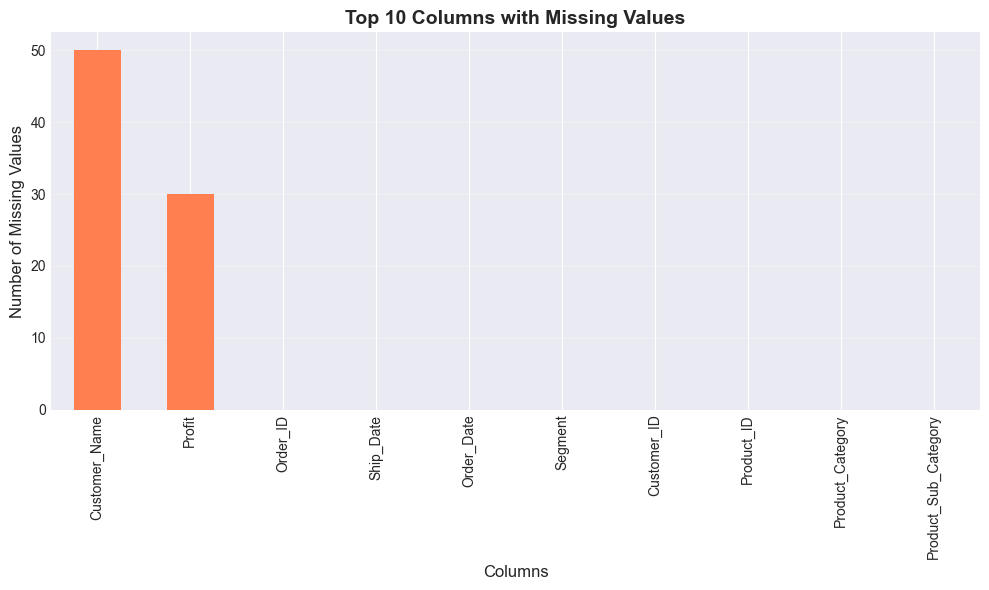

✓ Saved: 02_data_types_distribution.png


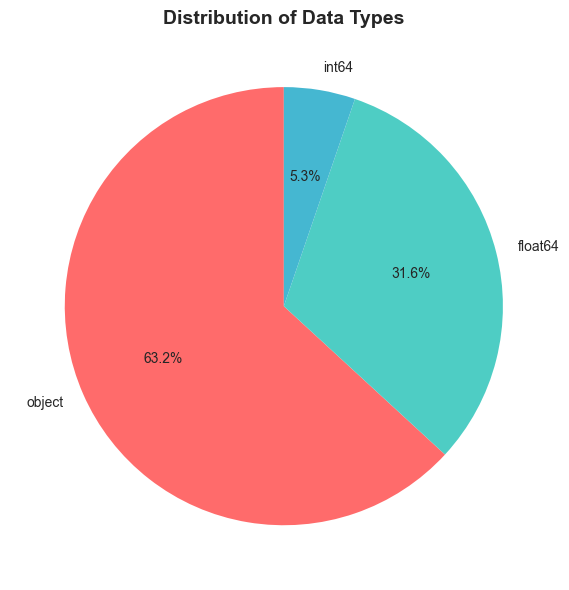

In [22]:
# ============================================================================
# 7. INITIAL VISUALIZATIONS
# ============================================================================

print("\n" + "="*80)
print("CREATING INITIAL VISUALIZATIONS")
print("="*80)

# Create visualization directory if not exists
os.makedirs('outputs/figures', exist_ok=True)

# 1. Missing values visualization
fig, ax = plt.subplots(figsize=(10, 6))
missing_data_plot = df_sales.isnull().sum().sort_values(ascending=False)[:10]
missing_data_plot.plot(kind='bar', ax=ax, color='coral')
ax.set_title('Top 10 Columns with Missing Values', fontsize=14, fontweight='bold')
ax.set_xlabel('Columns', fontsize=12)
ax.set_ylabel('Number of Missing Values', fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('outputs/figures/01_missing_values.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 01_missing_values.png")
plt.show()

# 2. Data types distribution
fig, ax = plt.subplots(figsize=(8, 6))
dtype_counts = df_sales.dtypes.value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
ax.pie(dtype_counts.values, labels=dtype_counts.index, autopct='%1.1f%%', 
       startangle=90, colors=colors)
ax.set_title('Distribution of Data Types', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('outputs/figures/02_data_types_distribution.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 02_data_types_distribution.png")
plt.show()

In [23]:
# ============================================================================
# 8. SAVE INITIAL INSPECTION REPORT
# ============================================================================

# Create comprehensive report
report = f"""
RETAIL & MARKETING ANALYTICS PROJECT
Initial Data Inspection Report
{'='*80}

1. DATASET OVERVIEW
   - Total Records: {df_sales.shape[0]:,}
   - Total Columns: {df_sales.shape[1]}
   - Memory Usage: {df_sales.memory_usage(deep=True).sum() / 1024**2:.2f} MB
   
2. DATA QUALITY SUMMARY
   - Missing Values: {df_sales.isnull().sum().sum():,} cells ({(df_sales.isnull().sum().sum()/(df_sales.shape[0]*df_sales.shape[1])*100):.2f}%)
   - Duplicate Rows: {duplicates} ({(duplicates/len(df_sales)*100):.2f}%)
   - Complete Rows: {df_sales.dropna().shape[0]:,} ({(df_sales.dropna().shape[0]/len(df_sales)*100):.2f}%)

3. COLUMN TYPES
   - Numerical: {len(df_sales.select_dtypes(include=[np.number]).columns)}
   - Categorical/Object: {len(df_sales.select_dtypes(include=['object']).columns)}
   - DateTime: {len(df_sales.select_dtypes(include=['datetime64']).columns)}

4. NEXT STEPS
   ✓ Proceed to Data Cleaning (Notebook 02)
   - Handle missing values
   - Remove duplicates
   - Convert data types
   - Handle outliers
   - Feature engineering

Report Generated: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
{'='*80}
"""

# Save report
with open('outputs/reports/01_initial_inspection_report.txt', 'w', encoding='utf-8') as f:
    f.write(report)

print("\n✓ Initial inspection report saved!")
print(report)


✓ Initial inspection report saved!

RETAIL & MARKETING ANALYTICS PROJECT
Initial Data Inspection Report

1. DATASET OVERVIEW
   - Total Records: 10,000
   - Total Columns: 19
   - Memory Usage: 8.23 MB

2. DATA QUALITY SUMMARY
   - Missing Values: 80 cells (0.04%)
   - Duplicate Rows: 0 (0.00%)
   - Complete Rows: 9,921 (99.21%)

3. COLUMN TYPES
   - Numerical: 7
   - Categorical/Object: 12
   - DateTime: 0

4. NEXT STEPS
   ✓ Proceed to Data Cleaning (Notebook 02)
   - Handle missing values
   - Remove duplicates
   - Convert data types
   - Handle outliers
   - Feature engineering

Report Generated: 2025-12-18 20:02:01



In [24]:
# ============================================================================
# 9. SAVE CHECKPOINT
# ============================================================================

# Save initial loaded data for reference
df_sales.to_csv('data/raw/original_data_checkpoint.csv', index=False)
print("\n✓ Data checkpoint saved: data/raw/original_data_checkpoint.csv")

print("\n" + "="*80)
print("NOTEBOOK 01 COMPLETED SUCCESSFULLY!")
print("="*80)
print("\n Next Step: Open Notebook 02 - Data Cleaning and Preprocessing")
print("="*80)


✓ Data checkpoint saved: data/raw/original_data_checkpoint.csv

NOTEBOOK 01 COMPLETED SUCCESSFULLY!

 Next Step: Open Notebook 02 - Data Cleaning and Preprocessing
